In [13]:
import base64
import os
from cloudflare import Cloudflare
from IPython.display import Image, display

# Configuration
ACCOUNT_ID = "8a0e86936ffdb69b5d71eb42c4873a33"
API_TOKEN = "z9NPe81vZqqfohfpH0Tb1rmgE1Ap3xPSe2Y11h3Z"
MODEL_ID = "@cf/meta/llama-4-scout-17b-16e-instruct"

# Initialize the Cloudflare client
client = Cloudflare(
    api_token=API_TOKEN,
    # account_id=ACCOUNT_ID
)

print("Client initialized.")

Client initialized.


In [14]:
def encode_image_to_data_uri(file_path):
    """
    Encodes a local image file to a Base64 Data URI.
    """
    mime_type = "image/jpeg" # Default fallback
    
    # Determine mime type based on extension
    ext = file_path.lower().split('.')[-1]
    if ext in ['png']:
        mime_type = "image/png"
    elif ext in ['jpg', 'jpeg']:
        mime_type = "image/jpeg"
    elif ext in ['webp']:
        mime_type = "image/webp"
        
    with open(file_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
        
    return f"data:{mime_type};base64,{encoded_string}"

print("Image helper defined.")

Image helper defined.


In [19]:
def run_ocr_pipeline(image_path):
    display(Image(filename=image_path, width=300))
    image_data_uri = encode_image_to_data_uri(image_path)
    
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "text", 
                    # STRICTER PROMPT HERE:
                    "text": "Transcribe the math in this image into LaTeX format. Output ONLY the raw LaTeX strings. Do not use Markdown formatting, do not explain the steps, and do not include headers like 'Step 1'."
                },
                {
                    "type": "image_url", 
                    "image_url": {
                        "url": image_data_uri
                    }
                }
            ]
        }
    ]

    try:
        response = client.ai.run(
            model_name=MODEL_ID,
            account_id=ACCOUNT_ID,
            messages=messages
        )
        
        if hasattr(response, 'result'):
            return response.result
        elif isinstance(response, dict):
            if 'response' in response:
                return response['response']
            elif 'result' in response:
                 return response['result']
        return response 
            
    except Exception as e:
        return f"Error running inference: {e}"

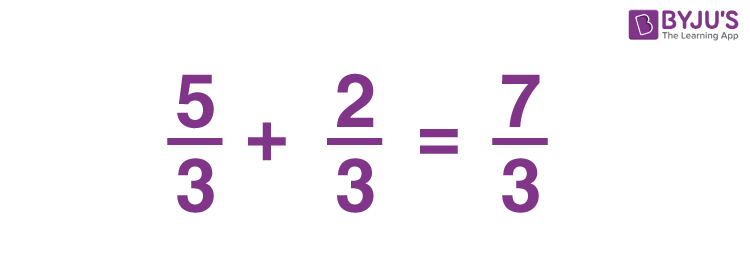


--- OCR Result ---

\frac{5}{3} + \frac{2}{3} = \frac{7}{3}


In [22]:
# Replace with your actual image filename
image_filename = "fractions_addition.png" 

# Create a dummy file if it doesn't exist for testing purposes (Optional)
if not os.path.exists(image_filename):
    print(f"File {image_filename} not found. Please upload an image.")
else:
    # Run the pipeline
    ocr_result = run_ocr_pipeline(image_filename)
    
    print("\n--- OCR Result ---\n")
    print(ocr_result)